# FOUNDATION OF MACHINE LEARNING

### Handwritten Digit Recognition


### What is Handwritten Digit Recognition?

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

### About the Python Deep Learning Project

In this project, we are going to implement a handwritten digit recognition app using the MNIST dataset. We will be using a special type of deep neural network that is "Convolutional Neural Networks". In the end, we are going to build a GUI in which you can draw the digit and recognize it straight away.

MNIST (“Modified National Institute of Standards and Technology”) is considered an unofficial computer vision “hello-world” dataset. This is a collection of thousands of handwritten pictures used to train classification models using Machine Learning techniques.

<center>
    <img src="https://techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/09/mnist-dataset.jpg" width="500">

### Prerequisites

The interesting Python project requires you to have basic knowledge of Python programming, deep learning with Keras library and the Tkinter library for building GUI.

##### Things to be considered:
* Install the latest Tensorflow library
* Prepare the dataset for the model
* Develop Perceptron model for classifying the handwritten digits
* Plot the change in accuracy per epochs
* Evaluate the model on the testing data
* Analyze the model summary

##  Installing the Packages


In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install pillow

##  Import the libraries and load the dataset

First, we are going to import all the modules that we are going to need for training our model. The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.


In [2]:
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.12.0


### Preparing the Handwritten Digit Recognition dataset

Let’s fetch and explore MNIST dataset from the Keras library.

The block of code below will load the images of handwritten digits from mnist dataset and randomly split the it as X_train, Y_train (to separate the features and label of training data) and X_test, Y_test (features and label of testing data). These split datasets will be used to train and test our model.


In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 

#Splitting into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Let’s check the number of entries in our dataset. For this we will be printing the shape of X_train and X_test.

In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


From the above output we can see that we have 60000 entries (images) as part of train data with 28×28 pixel values and 10000 entries as a part of test of data of same size. You can check the individual pixels of any of the image, eg: X_train[0].

Let’s preprocess our data for further usage. We will reshape the dataset from 28×28 to 784 and convert it into float32 datatype for training our neural network.

* Reshape the data
* Change the datatype to float32
* Normalize the dataset
* Perform One-Hot Encoding on the labels

In [5]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


The output tells the number of records within the train and test data.

Now that we have prepared our data. Next we will be using this data to build our model.

### Building the Handwritten Digit Recognition Models

#### Preparing the Model: Single layer Perceptron
This model is the most basic sequential model with 0 hidden layers in it.

#### Adding the model layer
We will be building the simplest model defined in the Sequential class as a linear stack of Layers

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_1 = Sequential()

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In the above code we are importing the sequential keras model with 0 hidden layers. We have defined the output layer as 10. This is our dense layer. 10 is chosen as we have numbers from 0 to 9 to be classified in the dataset. shape. Total number of neurons in the input layer is 784. The activation function chosen in the dense layer is softmax. In simple terms, the model will have 784 input neurons to give the output between 0-9 numbers.

### Compiling the model

Next step is to compile the model. For compiling we need to define three parameters: optimizer, loss, and metrics.

In [7]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

Model will be now trained on the on the training data. For this we will be defining the epochs, batchsize, and validation size

* epoch: Number of times that the model will run through the training dataset
* batch_size: Number of training instances to be shown to the model before a weight is updated
* validation_split: Defines the fraction of data to be used for validation purpose

In [8]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 3s 3ms/step - loss: 1.0919 - accuracy: 0.7461 - val_loss: 0.6581 - val_accuracy: 0.8572
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6072 - accuracy: 0.8543 - val_loss: 0.5103 - val_accuracy: 0.8747
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5119 - accuracy: 0.8701 - val_loss: 0.4521 - val_accuracy: 0.8843
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4660 - accuracy: 0.8794 - val_loss: 0.4193 - val_accuracy: 0.8912
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4375 - accuracy: 0.8844 - val_loss: 0.3983 - val_accuracy: 0.8953
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4177 - accuracy: 0.8883 - val_loss: 0.3830 - val_accuracy: 0.8992
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4029 - accuracy: 0.8908 - val_loss: 0.3719 - val_accuracy: 0.9009
Epoch 

### Plot the change in accuracy and loss per epochs

You can plot a curve to check the variation of accuracy and loss as the number of epochs increases. For this you can use, matplotlib to plot the curve.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


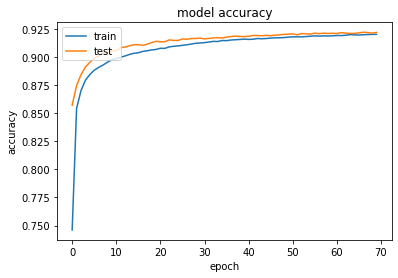

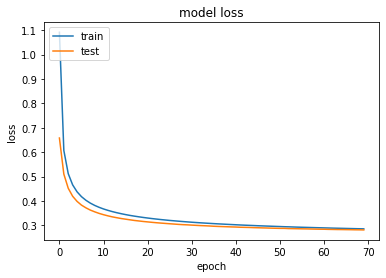

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating the Handwritten Digit Recognition Model on Test Data

We will now test the accuracy of the model on the testing dataset.

In [17]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9213
Test accuracy: 0.9212999939918518


Finally you can check the configuration of the model using get_config()

In [18]:
model_1.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

Final accuracy of our trained model comes to be 92.13%